# Vilnius Citizens
## By Svajune Klimasauskaite

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits import mplot3d
import datetime as dt
from pandas import DataFrame as df
#from google.cloud import storage

%matplotlib inline

## Load Data



In [33]:
#Load data from Vilnius Open Data
citizen=pd.read_csv("https://raw.githubusercontent.com/vilnius/gyventojai/master/registered_people_n_streets.csv")
citizen.sample(5)

,GIMIMO_METAI,GIMIMO_VALSTYBE,LYTIS,SEIMOS_PADETIS,KIEK_TURI_VAIKU,SENIUNIJA,GATVE,SENIUNNR,TER_REJ_KODAS,GATV_K,GAT_ID
167827,2003,LTU,V,NaN,0,Naujamiestis,Gedimino pr.,17.0,G1,135.0,21991.0
422985,1938,LTU,M,N,0,Žirmūnai,Žirmūnų g.,2.0,G1,694.0,22524.0
177233,2018,LTU,V,NaN,0,Šnipiškės,Dubingių g.,3.0,G1,103.0,21959.0
414494,1967,LTU,V,V,0,Senamiestis,V. Šopeno g.,16.0,G1,120.0,21976.0
247810,2004,POL,V,NaN,0,Antakalnis,Vytauto Žalakevičiaus g.,13.0,G1,2969.0,127513.0


In [34]:
# Get rid of unnecessary columns
citizen.drop(columns = ['TER_REJ_KODAS','GATV_K','GAT_ID'], inplace=True)
# Translate column names to english 
citizen.rename(columns={'GIMIMO_METAI':'birth_date', 'GIMIMO_VALSTYBE':'birth_country',
                        'LYTIS':'gender', 'SEIMOS_PADETIS':'family_status',
                       'KIEK_TURI_VAIKU':'no_kids', 'SENIUNIJA':'munic', 'SENIUNNR':'munic_code',
                       'GATVE':'street'}, inplace=True)

In [35]:
citizen.sample(5)

,birth_date,birth_country,gender,family_status,no_kids,munic,street,munic_code
1470,1997,UKR,V,NaN,0,Karoliniškės,Sausio 13-osios g.,10.0
416195,1937,LTU,V,N,0,Žirmūnai,Minties g.,2.0
270019,1958,LTU,M,I,0,Naujoji Vilnia,Šiaurės Sodų 3-ioji g.,14.0
239857,2012,LTU,M,NaN,0,Karoliniškės,Virginijaus Druskio g.,10.0
437778,1967,LTU,M,V,0,Vilkpėdė,Savanorių pr.,18.0


## Data Check

In [56]:
citizen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576736 entries, 0 to 576735
Data columns (total 10 columns):
birth_date       576736 non-null int64
birth_country    576736 non-null object
gender           576736 non-null object
family_status    576736 non-null object
no_kids          576736 non-null int64
munic            569644 non-null object
street           569644 non-null object
munic_code       569644 non-null float64
today            576736 non-null int64
age              576736 non-null int64
dtypes: float64(1), int64(4), object(5)
memory usage: 44.0+ MB


In [57]:
# Count null records
citizen.isnull().sum()

birth_date          0
birth_country       0
gender              0
family_status       0
no_kids             0
munic            7092
street           7092
munic_code       7092
today               0
age                 0
dtype: int64

In [58]:
# Count unique records
citizen.nunique()

birth_date        110
birth_country     141
gender              2
family_status       4
no_kids            12
munic              21
street           2301
munic_code         21
today               1
age               110
dtype: int64

## Data Cleaning and Augmentation

### Birth Date

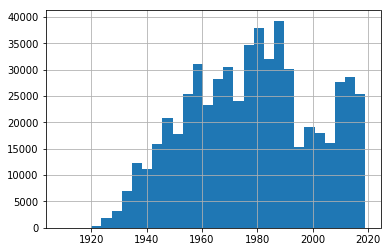

In [36]:
# Plot birth date distribution
citizen.birth_date.hist(bins=30);

#### Calculate Age 

In [37]:
# Create today date
citizen['today'] = dt.datetime.today().strftime("%Y")
citizen['today'] = citizen['today'].astype(int)

# Substact birth date from today to get an age
citizen['age'] = citizen['today'] - citizen['birth_date']
citizen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576736 entries, 0 to 576735
Data columns (total 10 columns):
birth_date       576736 non-null int64
birth_country    576736 non-null object
gender           576736 non-null object
family_status    342736 non-null object
no_kids          576736 non-null int64
munic            569644 non-null object
street           569644 non-null object
munic_code       569644 non-null float64
today            576736 non-null int64
age              576736 non-null int64
dtypes: float64(1), int64(4), object(5)
memory usage: 44.0+ MB


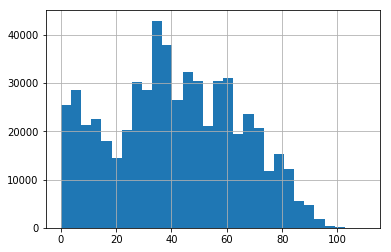

In [38]:
# Plot age distribution
citizen.age.hist(bins=30);

### Birth Country

In [28]:
# Check unique values
citizen.birth_country.unique()

array(['LTU', 'BLR', 'LUX', 'RUS', 'IRN', 'JOR', 'UKR', 'IRL', 'KAZ',
       'GBR', 'THA', 'DEU', 'LVA', 'ARM', 'BEL', 'IND', 'TJK', 'KHM',
       'EST', 'POL', 'USA', 'GHA', 'ARE', 'CHN', 'DNK', 'COL', 'GRC',
       'BGR', 'RWA', 'FRA', 'VNM', 'SYR', 'GEO', 'AZE', 'EGY', 'KGZ',
       'TUR', 'AUS', 'ITA', 'ECU', 'JPN', 'UZB', 'BRA', 'NGA', 'PAK',
       'AFG', 'KOR', 'TKM', 'CAN', 'ESP', 'MDA', 'NLD', 'CHE', 'FIN',
       'CMR', 'AUT', 'SRB', 'CHL', 'MDG', 'SWE', 'AGO', 'VEN', 'CYP',
       'PHL', 'NOR', 'PRK', 'ALB', 'KWT', 'HUN', 'ISR', 'TUN', 'SAU',
       'ETH', 'CZE', 'SVK', 'LBN', 'MAR', 'MYS', 'ARG', 'OMN', 'MEX',
       'PRT', 'ISL', 'ROU', 'CUB', 'MLT', 'IRQ', 'PER', 'MNG', 'COD',
       'BGD', 'ZAF', 'MKD', 'KEN', 'URY', 'HRV', 'BIH', 'TON', 'IDN',
       'MOZ', 'SGP', 'NPL', 'HKG', 'PSE', 'CIV', 'SVN', 'HND', 'LKA',
       'UGA', 'GIN', 'YUG', 'DZA', 'ROM', 'LBR', 'ERI', 'NAM', 'BHR',
       'CRI', 'NZL', 'GNB', 'MNE', 'MUS', 'LBY', 'ZWE', 'COM', 'SDN',
       'PAN', 'PRY',

In [55]:
# Count unique values
citizen.birth_country.nunique()

141

### Gender

In [40]:
# Check unique values
citizen.gender.unique()

array(['M', 'V', 'v'], dtype=object)

In [41]:
# Harmonise indications - correct the mistake
citizen['gender'] = citizen['gender'].str.capitalize()
citizen.gender.unique()

array(['M', 'V'], dtype=object)

### Family Status

In [44]:
# Check unique values
citizen.family_status.unique()

array([nan, 'I', 'V', 'N'], dtype=object)

In [59]:
# According the specification nan case should be indicated with "F" stands for "unknown"
# I - divorsed
# V - married
# N - widow
citizen['family_status'].replace(np.nan, 'F', inplace=True)

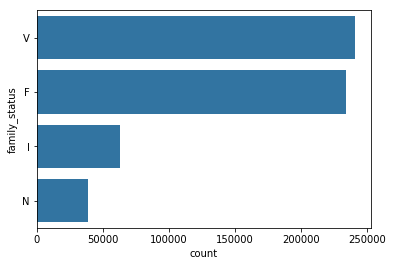

In [60]:
# plot distribution
base_color=sb.color_palette()[0]
order_rule=citizen['family_status'].value_counts().index
sb.countplot(data=citizen, y='family_status', color=base_color, order=order_rule);

In [48]:
# check for null values
citizen['family_status'].isnull().sum()

0

### Number of Kids

In [125]:
# Check unique values
citizen.no_kids.unique()

array([ 0,  1,  2,  4,  3,  5,  6,  7,  8, 12,  9, 10])

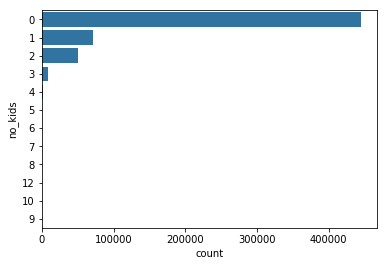

In [49]:
# plot distribution
base_color=sb.color_palette()[0]
order_rule=citizen['no_kids'].value_counts().index
sb.countplot(data=citizen, y='no_kids', color=base_color, order=order_rule);

In [50]:
# Calculate farthers and mothers. 
# It could be that we do double counting of kids when father and mather is reffering to the same kid. 

print('{} children with mothers'.format(citizen[(citizen['gender']=='M')]['no_kids'].sum()))
print('{} children with farthers'.format(citizen[(citizen['gender']=='V')]['no_kids'].sum()))

109271 children with mothers
95866 children with farthers


### Municipality 

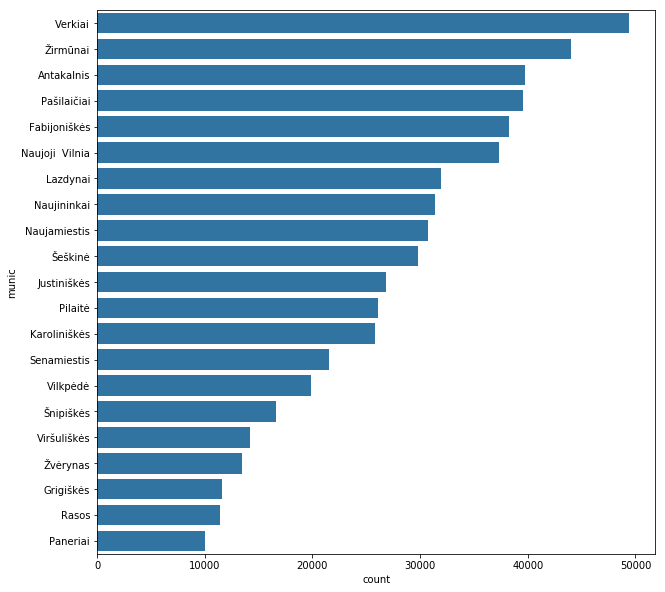

In [85]:
# Plot distribution
plt.figure(figsize = [10, 10]) 
order_rule=citizen['munic'].value_counts().index
sb.countplot(data=citizen, y='munic', color=base_color, order=order_rule);

In [67]:
citizen['munic'].unique()

array(['Šnipiškės', 'Pašilaičiai', 'Fabijoniškės', 'Pilaitė',
       'Naujamiestis', 'Paneriai', 'Lazdynai', 'Senamiestis',
       'Naujininkai', 'Vilkpėdė', 'Grigiškės', 'Naujoji  Vilnia',
       'Žirmūnai', 'Karoliniškės', 'Justiniškės', 'Viršuliškės',
       'Antakalnis', 'Šeškinė', 'Verkiai', nan, 'Rasos', 'Žvėrynas'],
      dtype=object)

In [82]:
#A DataFrame without municipality
no_municipality = citizen[(citizen['munic'].isnull()) == True]

## Save the File

In [86]:
#df.to_csv(neigh, '⁨Google Drive⁩/My Drive⁩/Vilniaus duomenys⁩/Vilnius.csv', sep=';')